### StarAgile Assignment on Artificial Neural Networks, Level - 2

### Assignment Submitted by VINAY M on 17-09-2023

- Build an ANN to predict the passenger is survived or not on titanic dataset.

- Data set (Test):
    https://drive.google.com/file/d/1uQYd6aptuh6qYqKMMCXr1FZALFo53eZj/view?usp=share_link

- Data set(Train):
    https://drive.google.com/file/d/1iEuqOToDAOSnqs_FOKiExScUkA0h3k-l/view?usp=share_link

- What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

In [3]:
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dfTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Survival Column missing in dfTest
# Not possible to merge both and perform EDA
# EDA can be done on DF Train

In [6]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# lets treat dfTrain

In [9]:
# Checking the Cardinality
# checking cardinality of categorical columns
categorical_columns = dfTrain.select_dtypes(include=['object'])
for column in categorical_columns:
    unique_values = dfTrain[column].unique()
    cardinality = len(unique_values)
    print(f"{column}:::::: {cardinality} Categories \n{unique_values} \n\n")

Name:::::: 891 Categories 
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Mi

In [10]:
rem_col = ['PassengerId',
'Name',
'Ticket',
'Cabin']

In [11]:
dfTrain.drop(columns=rem_col, inplace=True)
dfTest.drop(columns=rem_col, inplace=True)

In [12]:
dfTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
dfTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [14]:
# Remapping Feature Dictionary
Embarked_dict= {
    'C' : 'Cherbourg',
    'Q' : 'Queenstown',
    'S' : 'Southampton'
}

Sex_dict = {
    'male' : 'Male',
    'female' : 'Female'
}

In [15]:
dfTrain['Embarked'] = dfTrain['Embarked'].map(Embarked_dict)
dfTest['Embarked'] = dfTest['Embarked'].map(Embarked_dict)
dfTrain['Sex'] = dfTrain['Sex'].map(Sex_dict)
dfTest['Sex'] = dfTest['Sex'].map(Sex_dict)

In [16]:
dfTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.2500,Southampton
1,1,1,Female,38.0,1,0,71.2833,Cherbourg
2,1,3,Female,26.0,0,0,7.9250,Southampton
3,1,1,Female,35.0,1,0,53.1000,Southampton
4,0,3,Male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2,Male,27.0,0,0,13.0000,Southampton
887,1,1,Female,19.0,0,0,30.0000,Southampton
888,0,3,Female,NaN,1,2,23.4500,Southampton
889,1,1,Male,26.0,0,0,30.0000,Cherbourg


In [17]:
dfTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Male,34.5,0,0,7.8292,Queenstown
1,3,Female,47.0,1,0,7.0000,Southampton
2,2,Male,62.0,0,0,9.6875,Queenstown
3,3,Male,27.0,0,0,8.6625,Southampton
4,3,Female,22.0,1,1,12.2875,Southampton
...,...,...,...,...,...,...,...
413,3,Male,NaN,0,0,8.0500,Southampton
414,1,Female,39.0,0,0,108.9000,Cherbourg
415,3,Male,38.5,0,0,7.2500,Southampton
416,3,Male,NaN,0,0,8.0500,Southampton


In [18]:
dfTrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
dfTest.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [20]:
# Generating a Age Series to find the median to impute missing ages
A = dfTrain["Age"]
B = dfTest["Age"]

In [21]:
C = A.append(B, ignore_index=True)

In [22]:
C

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64

In [23]:
C.isnull().sum()

263

In [24]:
age_median = C.median()

In [25]:
age_median

28.0

In [26]:
dfTrain["Age"].fillna(age_median, inplace=True)
dfTest["Age"].fillna(age_median, inplace=True)

In [27]:
dfTrain.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
dfTest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:
Embarked_Mode = dfTrain["Embarked"].mode()

In [30]:
Embarked_Mode[0]

'Southampton'

In [31]:
dfTrain["Embarked"].fillna(Embarked_Mode[0], inplace=True)

In [32]:
dfTrain.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
dfTest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [34]:
fare_median = dfTrain["Fare"].median()

In [35]:
dfTest["Fare"].fillna(fare_median, inplace=True)

In [36]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [37]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [38]:
# Some EDA

<Axes: xlabel='Survived', ylabel='count'>

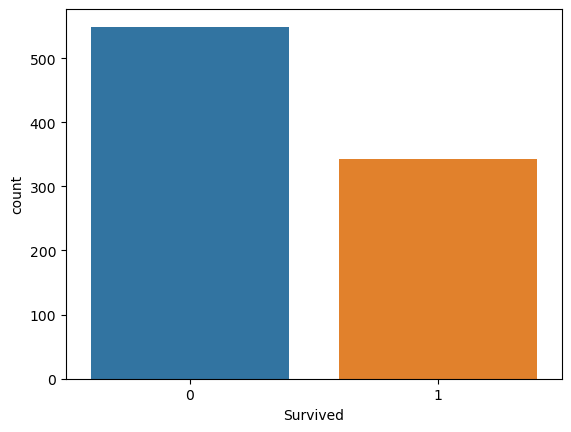

In [39]:
sns.countplot(data=dfTrain,x=dfTrain["Survived"])

In [40]:
# check for value counts
dfTrain["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

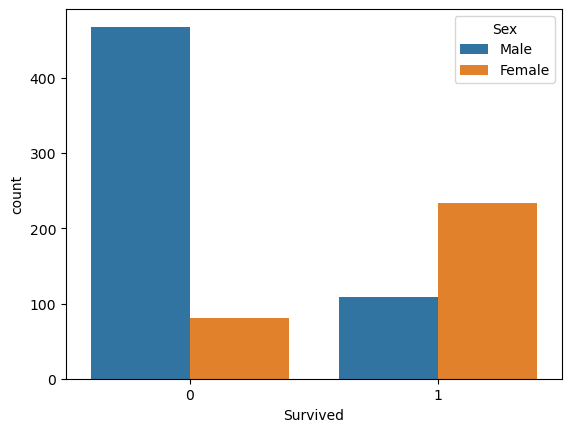

In [41]:
# Comparing dead and survived wrt sex
# stacked bar chart or countplot with hue = sex
sns.countplot(data=dfTrain,x=dfTrain["Survived"], hue=dfTrain["Sex"])

<Axes: xlabel='Sex', ylabel='count'>

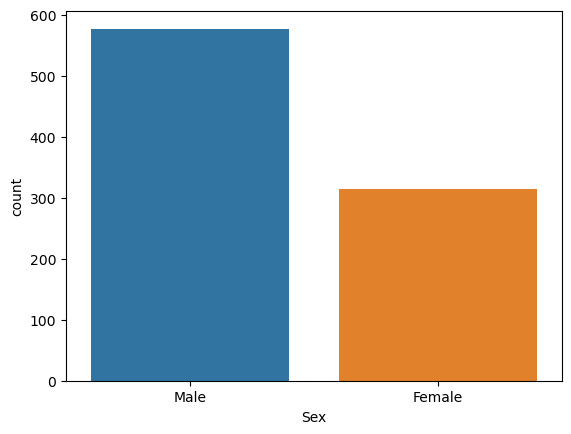

In [42]:
# How many male and female in Train Data
sns.countplot(data=dfTrain,x=dfTrain["Sex"])

In [43]:
svl_rate = dfTrain.groupby('Sex')['Survived'].value_counts()
svl_rate

Sex     Survived
Female  1           233
        0            81
Male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

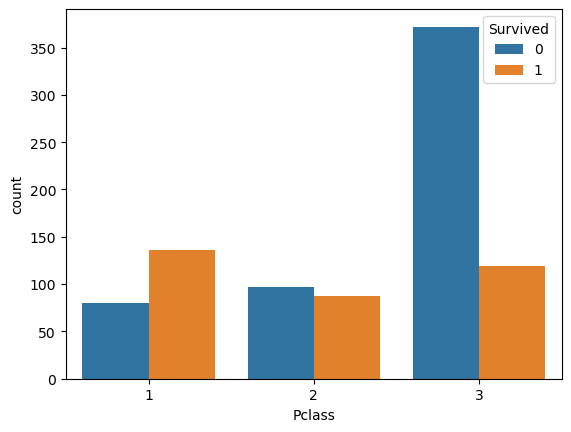

In [44]:
# Survival based on pclass
# countplot of pclass with hue = Survived
sns.countplot(data = dfTrain,
              x = dfTrain["Pclass"],
              hue = dfTrain["Survived"])

In [45]:
svl_rate_pclass = dfTrain.groupby('Pclass')['Survived'].value_counts()
svl_rate_pclass

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

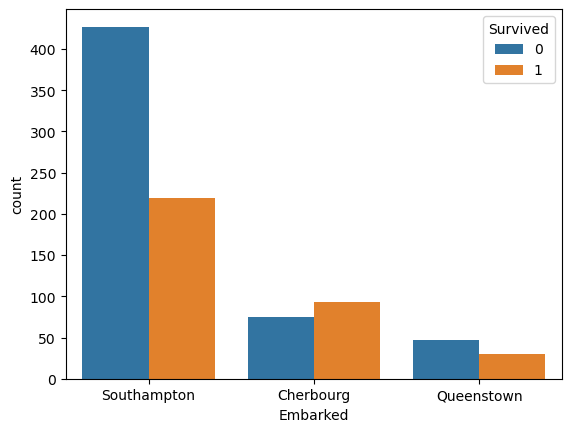

In [46]:
# Survival based on pclass
# countplot for Embarked with hue on Survived
sns.countplot(data = dfTrain,
              x = dfTrain["Embarked"],
              hue = dfTrain["Survived"])

In [47]:
# Fare Distribution

<Axes: xlabel='Fare', ylabel='Count'>

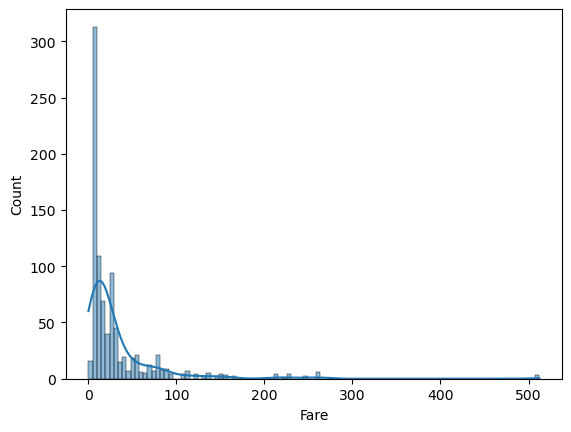

In [48]:
sns.histplot(dfTrain['Fare'], kde=True)

In [49]:
# End of EDA

In [50]:
# ANN Prediction

In [51]:
dfTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.2500,Southampton
1,1,1,Female,38.0,1,0,71.2833,Cherbourg
2,1,3,Female,26.0,0,0,7.9250,Southampton
3,1,1,Female,35.0,1,0,53.1000,Southampton
4,0,3,Male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2,Male,27.0,0,0,13.0000,Southampton
887,1,1,Female,19.0,0,0,30.0000,Southampton
888,0,3,Female,28.0,1,2,23.4500,Southampton
889,1,1,Male,26.0,0,0,30.0000,Cherbourg


In [52]:
dfTest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Male,34.5,0,0,7.8292,Queenstown
1,3,Female,47.0,1,0,7.0000,Southampton
2,2,Male,62.0,0,0,9.6875,Queenstown
3,3,Male,27.0,0,0,8.6625,Southampton
4,3,Female,22.0,1,1,12.2875,Southampton
...,...,...,...,...,...,...,...
413,3,Male,28.0,0,0,8.0500,Southampton
414,1,Female,39.0,0,0,108.9000,Cherbourg
415,3,Male,38.5,0,0,7.2500,Southampton
416,3,Male,28.0,0,0,8.0500,Southampton


In [53]:
# One hot encoding both Test and Train Data
Df_Final = pd.get_dummies(dfTrain, columns=['Sex','Embarked'])

In [54]:
Df_Final

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Female,Sex_Male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [55]:
validationData = pd.get_dummies(dfTest, columns=['Sex','Embarked'])

In [56]:
validationData

,Pclass,Age,SibSp,Parch,Fare,Sex_Female,Sex_Male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,1,0,0,1


In [57]:
# Splitting X and Y from Data
X = Df_Final.drop(["Survived"], axis=1)
y = Df_Final["Survived"]

In [58]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_Female,Sex_Male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [62]:
model = keras.Sequential([
    keras.layers.Input(shape=(10,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 200)

Epoch 1/200
20/20 [==============================] - 1s 23ms/step - loss: 1.6770 - accuracy: 0.4976 - val_loss: 0.6556 - val_accuracy: 0.7388
Epoch 2/200
20/20 [==============================] - 0s 7ms/step - loss: 0.7237 - accuracy: 0.6918 - val_loss: 0.5990 - val_accuracy: 0.7687
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 0.6351 - accuracy: 0.6838 - val_loss: 0.6040 - val_accuracy: 0.7687
Epoch 4/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6232 - accuracy: 0.6790 - val_loss: 0.5609 - val_accuracy: 0.7761
Epoch 5/200
20/20 [==============================] - 0s 7ms/step - loss: 0.6070 - accuracy: 0.6870 - val_loss: 0.5575 - val_accuracy: 0.7164
Epoch 6/200
20/20 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 0.7159 - val_loss: 0.6403 - val_accuracy: 0.5933
Epoch 7/200
20/20 [==============================] - 0s 7ms/step - loss: 0.5482 - accuracy: 0.7207 - val_loss: 0.5211 - val_accuracy: 0.7351
Epoch 8/200


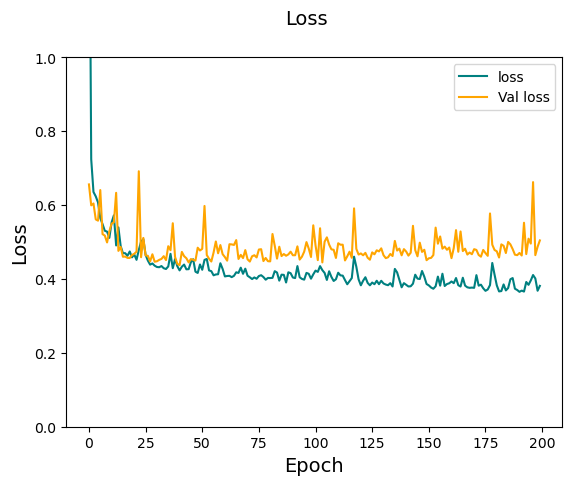

In [65]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(model_history.history['loss'],color='teal',label='loss')
plt.plot(model_history.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

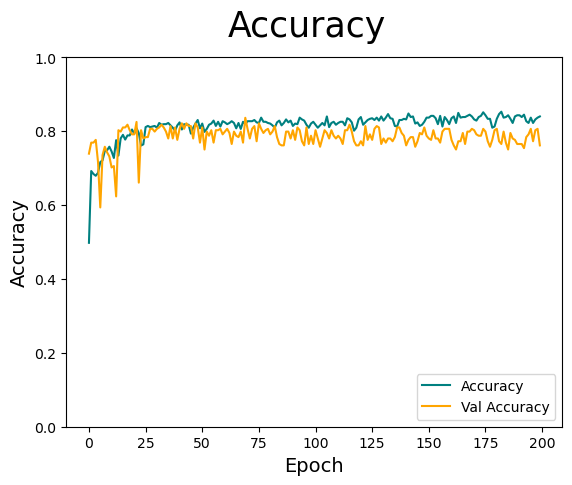

In [66]:
fig = plt.figure()
plt.plot(model_history.history['accuracy'],color='teal',label='Accuracy')
plt.plot(model_history.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [67]:
#saving model
from tensorflow.keras.models import load_model
model.save('Survival_Prediction.h5')

In [68]:
# Making Predictions from validationData

In [69]:
validationData

,Pclass,Age,SibSp,Parch,Fare,Sex_Female,Sex_Male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,28.0,0,0,8.0500,0,1,0,0,1


In [109]:
# picking randomly any row
import random
randomROW = random.randint(1,validationData.shape[0]-1)

In [110]:
randomROW

379

In [111]:
feed = validationData.iloc[0]

In [112]:
feed = np.array(feed).reshape(1, -1)

In [113]:
predictions = model.predict(feed)

1/1 [==============================] - 0s 45ms/step


In [115]:
if predictions > 0.5:
    print("Survived")
else:
    print("Not Survived")

Not Survived


In [116]:
# END OF ANN Modelling
# Assignment Submitted by VINAY M on 17-09-2023